In [1]:
from dmml_project.models.create_model import create_model
import sklearn.metrics as metrics
from dmml_project.models.model import Model
from dmml_project import PROJECT_ROOT
from dmml_project.dataset import Dataset
import matplotlib.pyplot as plt
import seaborn as sns
import json

KIND = "neural_network"

params = json.loads('''
{
    "network": "lstm_embeddings",
    "base_size": 8,
    "depth": 2,
    "epochs": 10,
    "dropout": 0.5,
    "batchnorm": true,
    "batch_size": 32,
    "lr": 0.001,
    "optimizer": "adam"
}
''')

dataset: Dataset = Dataset.load(f"{PROJECT_ROOT}/data/train.tsv")
model: Model = create_model(kind=KIND, **params)

In [2]:
train, valid = dataset.fold(0, 5)
history = model.train(train, valid=valid)
accuracy, cm = model.evaluate(valid, metric=lambda pred, true: (metrics.accuracy_score(pred,true), metrics.confusion_matrix(pred,true, normalize="true")))

Epoch  4/10:  36%|███▌      | 3275/9137 [01:27<02:44, 35.66it/s]

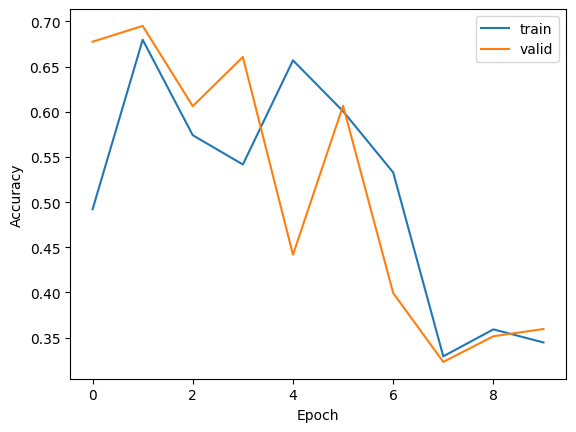

In [3]:
if KIND == "neural_network":
    train_accuracy, valid_accuracy = history
    plt.plot(train_accuracy, label="train")
    plt.plot(valid_accuracy, label="valid")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

Accuracy: 35.96%


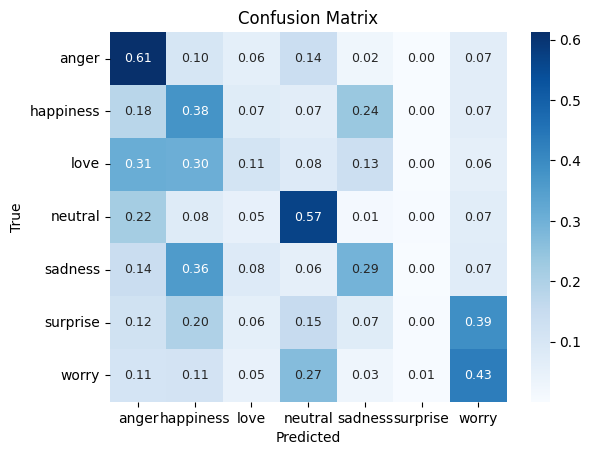

In [4]:
print(f"Accuracy: {accuracy*100:.2f}%")
sns.heatmap(cm, annot=True, cmap="Blues", fmt=".2f", annot_kws={"size": 9}, xticklabels=model.classes(), yticklabels=model.classes())
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()